## DATA AND LIBRARIES IMPORT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('AAPL.csv', date_parser=True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700


In [5]:
data['last_close'] = data['Close'].shift(1)

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400,NaN
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857


In [7]:
 data['return'] = (data['Close'] - data['last_close']) / data['last_close']

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400,NaN,NaN
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648


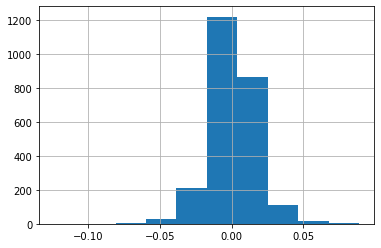

In [9]:
data['return'].hist()

In [10]:
train = data[data['Date']<='2018-12-31']
test = data[data['Date']>'2018-12-31']

In [11]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400,NaN,NaN
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648


In [12]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
2264,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700,157.740005,0.001141
2265,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200,157.919998,-0.099607
2266,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100,142.190002,0.042689
2267,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800,148.259995,-0.002226
2268,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300,147.929993,0.019063


In [13]:
train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close', 'return'],
      dtype='object')

In [14]:
test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close', 'return'],
      dtype='object')

In [15]:
train.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
test.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
## for test data prep

train_prep = train
test_prep = test

In [18]:
train.head()

,return
0,NaN
1,0.001729
2,-0.015906
3,-0.001849
4,0.006648


In [19]:
train = train.to_numpy()

In [20]:
train = train[1:]

In [21]:
train

array([[ 0.00172885],
       [-0.01590631],
       [-0.00184859],
       ...,
       [-0.00648981],
       [ 0.00051234],
       [ 0.0096653 ]])

In [22]:
train.shape

(2263, 1)

In [23]:
test = test.to_numpy()

In [24]:
test.shape

(210, 1)

## Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [28]:
scaler.scale_

array([0.01742307])

In [29]:
train

array([[ 0.05385908],
       [-1.03507039],
       [-0.16703989],
       ...,
       [-0.45362419],
       [-0.02125772],
       [ 0.54391555]])

In [30]:
test

array([[-0.06181623],
       [-5.84429147],
       [ 2.32285226],
       [-0.25506046],
       [ 0.96682276],
       [ 0.84736193],
       [ 0.05613645],
       [-0.69081484],
       [-0.99036286],
       [ 1.04738234],
       [ 0.57386558],
       [ 0.21349135],
       [ 0.22621221],
       [-1.41560869],
       [ 0.10481638],
       [-0.58223417],
       [ 1.77458753],
       [-0.65847284],
       [-0.7221949 ],
       [ 3.79477262],
       [ 0.28600709],
       [-0.09972047],
       [ 1.50300011],
       [ 0.8546915 ],
       [-0.10753343],
       [-1.21433926],
       [-0.30526163],
       [-0.45738235],
       [ 0.3672753 ],
       [-0.36577126],
       [ 0.08179721],
       [-0.25500424],
       [ 0.04445114],
       [ 0.24205362],
       [-0.45093438],
       [ 0.51354845],
       [ 0.29078517],
       [-0.0943642 ],
       [ 0.05047512],
       [-0.69184071],
       [ 0.47598146],
       [ 0.16135852],
       [-0.23175454],
       [-0.45755873],
       [-0.79163619],
       [ 0

In [31]:
x_train = []
y_train = []

In [32]:
for i in range(10, train.shape[0]):
    x_train.append(train[i-10:i])
    y_train.append(train[i,0])

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape

(2253, 10, 1)

In [35]:
y_train.shape

(2253,)

## LSTM MODEL

In [36]:
model = tf.keras.models.Sequential([
     tf.keras.layers.LSTM(50, activation='relu', input_shape=(10,1), return_sequences=True),
                                    tf.keras.layers.Dropout(0.1),

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.15),

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.15),

                                    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.GlobalMaxPooling1D(),

                                    tf.keras.layers.Dense(1)
])

In [37]:
model.compile(
    optimizer = 'adam',
    loss = 'mse')

In [38]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
71/71 [==============================] - 6s 91ms/step - loss: 0.9998
Epoch 2/100
71/71 [==============================] - 6s 90ms/step - loss: 1.0000
Epoch 3/100
71/71 [==============================] - 6s 90ms/step - loss: 0.9996
Epoch 4/100
71/71 [==============================] - 6s 91ms/step - loss: 0.9997
Epoch 5/100
71/71 [==============================] - 7s 93ms/step - loss: 0.9996
Epoch 6/100
71/71 [==============================] - 7s 92ms/step - loss: 1.0000
Epoch 7/100
71/71 [==============================] - 6s 91ms/step - loss: 0.9997
Epoch 8/100
71/71 [==============================] - 6s 90ms/step - loss: 0.9996
Epoch 9/100
71/71 [==============================] - 6s 90ms/step - loss: 0.9994
Epoch 10/100
71/71 [==============================] - 6s 89ms/step - loss: 1.0056
Epoch 11/100
71/71 [==============================] - 6s 90ms/step - loss: 0.9996
Epoch 12/100
71/71 [==============================] - 7s 92ms/step - loss: 0.9995
Epoch 13/100
71/71 [=====

In [39]:
test

array([[-0.06181623],
       [-5.84429147],
       [ 2.32285226],
       [-0.25506046],
       [ 0.96682276],
       [ 0.84736193],
       [ 0.05613645],
       [-0.69081484],
       [-0.99036286],
       [ 1.04738234],
       [ 0.57386558],
       [ 0.21349135],
       [ 0.22621221],
       [-1.41560869],
       [ 0.10481638],
       [-0.58223417],
       [ 1.77458753],
       [-0.65847284],
       [-0.7221949 ],
       [ 3.79477262],
       [ 0.28600709],
       [-0.09972047],
       [ 1.50300011],
       [ 0.8546915 ],
       [-0.10753343],
       [-1.21433926],
       [-0.30526163],
       [-0.45738235],
       [ 0.3672753 ],
       [-0.36577126],
       [ 0.08179721],
       [-0.25500424],
       [ 0.04445114],
       [ 0.24205362],
       [-0.45093438],
       [ 0.51354845],
       [ 0.29078517],
       [-0.0943642 ],
       [ 0.05047512],
       [-0.69184071],
       [ 0.47598146],
       [ 0.16135852],
       [-0.23175454],
       [-0.45755873],
       [-0.79163619],
       [ 0

## Test Data Preparation

In [40]:
test_prep.head()

,return
2264,0.001141
2265,-0.099607
2266,0.042689
2267,-0.002226
2268,0.019063


In [41]:
last_10_days = train_prep.tail(10)

In [42]:
test_prep = last_10_days.append(test_prep)

In [43]:
test_prep

,return
2254,-0.009306
2255,0.012993
2256,-0.031192
2257,-0.025235
2258,-0.038896
...,...
2469,0.001645
2470,0.012316
2471,0.010017
2472,-0.023128


In [44]:
test_prep = test_prep.reset_index()

In [45]:
test_prep.drop(['index'], axis=1, inplace=True)

In [46]:
test_prep

,return
0,-0.009306
1,0.012993
2,-0.031192
3,-0.025235
4,-0.038896
...,...
215,0.001645
216,0.012316
217,0.010017
218,-0.023128


In [47]:
test_prep = scaler.fit_transform(test_prep)

In [48]:
test_prep = np.array(test_prep)

In [49]:
test_prep.shape

(220, 1)

In [50]:
x_test = []
y_test = []

In [51]:
for i in range(10, test_prep.shape[0]):
  x_test.append(test_prep[i-10:i])
  y_test.append(test_prep[i,0])

In [52]:
x_test, y_test = np.array(x_test), np.array(y_test)


## Single Step Prediction

In [53]:
y_pred = model.predict(x_test)

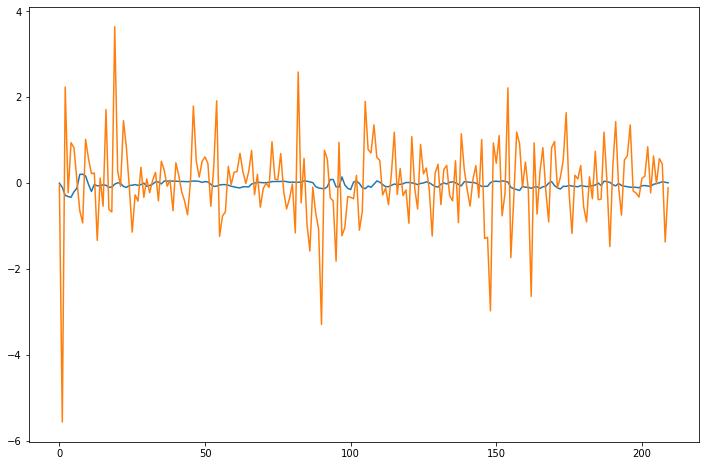

In [54]:
plt.figure(figsize=(12,8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_true')

## Multi-Step Prediction

In [55]:
temp_x = x_test[0]

for i in range(0, x_test.shape[0]):
  y_temp = model.predict(temp_x[i:].reshape(1,10,1))
  temp_x = np.append(temp_x, y_temp)
  temp_x.reshape(11+i, 1)

In [56]:
temp_x

array([-0.61581212,  0.60738388, -1.81633529, -1.48956006, -2.23893328,
       -1.52463564,  3.75763553, -0.46131858, -0.07721709,  0.424866  ,
       -0.00435659, -0.10122098, -0.29193282, -0.28209764, -0.21085605,
       -0.07463987,  0.01133045,  0.05112859,  0.06050827,  0.06225939,
        0.06426314,  0.06131683,  0.05768979,  0.05660019,  0.05599689,
        0.05574384,  0.0555124 ,  0.05553002,  0.05563176,  0.05575674,
        0.05587906,  0.05594417,  0.05596617,  0.05597328,  0.05597197,
        0.0559659 ,  0.05595826,  0.05595187,  0.05594759,  0.05594549,
        0.0559449 ,  0.05594503,  0.05594545,  0.0559459 ,  0.05594628,
        0.05594656,  0.05594671,  0.05594674,  0.05594674,  0.05594672,
        0.05594669,  0.05594667,  0.05594665,  0.05594665,  0.05594664,
        0.05594664,  0.05594664,  0.05594664,  0.05594664,  0.05594664,
        0.05594664,  0.05594664,  0.05594664,  0.05594664,  0.05594664,
        0.05594664,  0.05594664,  0.05594664,  0.05594664,  0.05

In [57]:
y_multistep = temp_x[10:]

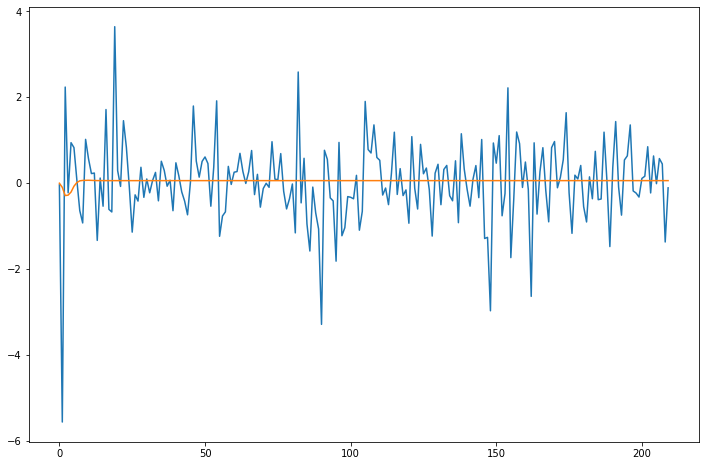

In [58]:
plt.figure(figsize= (12,8))
plt.plot(y_test)
plt.plot(y_multistep)

So, Even the prediction of return is not feasible with the LSTM model. The graphs show the same trend as in the first notebook. Also, the result for the single-step prediction is even worse in this case.

Now, We can also try to classify the return value in +ve or -ve return that'll also be of huge value. 